Importing Necessary Libraries:

In [3]:
import pandas as pd
import numpy as np
from IPython.display import display
import visuals as vs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the Dataset:

In [4]:
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Dataset might be missing")

Wholesale customers dataset has 440 samples with 6 features each.


# Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(6)
memory usage: 20.7 KB


In [6]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Implementation: Selecting Samples

To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail.

In [7]:
indices = [25,50,75]

samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16165,4230,7595,201,4003,57
1,6269,1095,1980,3860,609,2162
2,20398,1137,3,4407,3,975


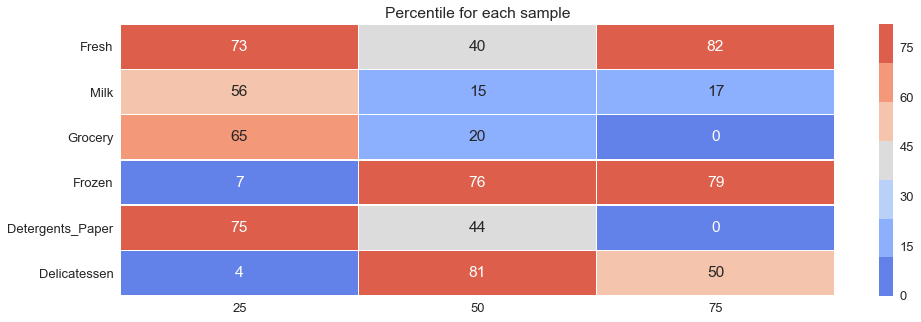

In [8]:
plt.figure(figsize=(16,5))
sns.set(font_scale = 1.3)
plt.title("Percentile for each sample")
pct = (data.rank(pct=True).loc[indices]*100).astype(int)
sns.heatmap(pct.transpose(), linewidth = 0.5, cmap=sns.color_palette("coolwarm", 7), annot = True)
plt.show()

### Customer Index : 25 (Index 0)
* Major Spending: Fresh, DetergentS_Paper (Based on "HeatMap" & "> mean_value")
* Medium Spending: Milk, Grocery (Based on "HeatMap" & "Around mean_value")
* Minor Spending: Frozen, Delicatessen (Based on "HeatMap" & "< mean_value")
* **Conclusion: Small Retail Store.**

### Customer Index : 50 (Index 1)
* Major Spending: Frozen, Delicatessen (Based on "HeatMap" & "> mean_value")
* Medium Spending: Fresh, Detergents_Paper (Based on "HeatMap" & "Around mean_value")
* Minor Spending: Milk, Grocery (Based on "HeatMap" & "< mean_value")
* **Conclusion: Resturent**

### Customer Index : 75 (Index 2)
* Major Spending: Frozen, Fresh (Based on "HeatMap" & "> mean_value")
* Medium Spending: Delicatessen (Based on "HeatMap" & "Around mean_value")
* Minor Spending: Milk, Grocery, Detergents_Paper (Based on "HeatMap" & "< mean_value")
* **Conclusion: Supplier (with Small Resturent Business) / Supermarket (with attached Small Resturent)**

## Implementation: Feature Relevance

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

features = list(data.columns)
for feature in features:
    new_data = data.drop([feature], axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size=0.25, random_state=42)
    reg = DecisionTreeRegressor().fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    print("R2 score for {} as dependent variable: {}".format(feature, score))

R2 score for Fresh as dependent variable: -0.5373126809068114
R2 score for Milk as dependent variable: 0.2210415780036491
R2 score for Grocery as dependent variable: 0.6737553819087372
R2 score for Frozen as dependent variable: -0.222790557479589
R2 score for Detergents_Paper as dependent variable: 0.2887452975827537
R2 score for Delicatessen as dependent variable: -1.6989763618966989


- I have looped and predicted every single feature as a dependent variable with the results shown above.
- **"Delicatessen"** as a dependent variable has **Most Negative R^2 score (Relative to others).**

>Meaning, the values of the delicatessen category (feature) contain very little information about the target variable or cannot be predicted by the other features in the dataset. Therefore, the feature is NOT necessarily redundant but may contain useful information not contained in the other features.

- **"Fresh", "Frozen"** as dependent variables have **Negative R^2 scores.**

>This imply that they are necessary for identifying customers' spending habits because the remaining features cannot explain the variation in them.

- **"Detergents_Paper", "Milk"** as dependent variables have **Very Low Positve R^2 scores.**

>These low scores imply that these are necessary for identifying customers' spending habits.

- **"Grocery"** as dependent variable has **Most Positve R^2 scores (Relative to others).**

>This score is a bit far from 1 but relative to the others this appears much higher.

**Basically the Model was able to predict this feature "Grocery" easily with the help of other features. Hence, this may be NOT as necessary when compared to the other features for identifying customers' spending habits**


## Visualize Feature Distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB1DFFA390>,
      dtype=object)

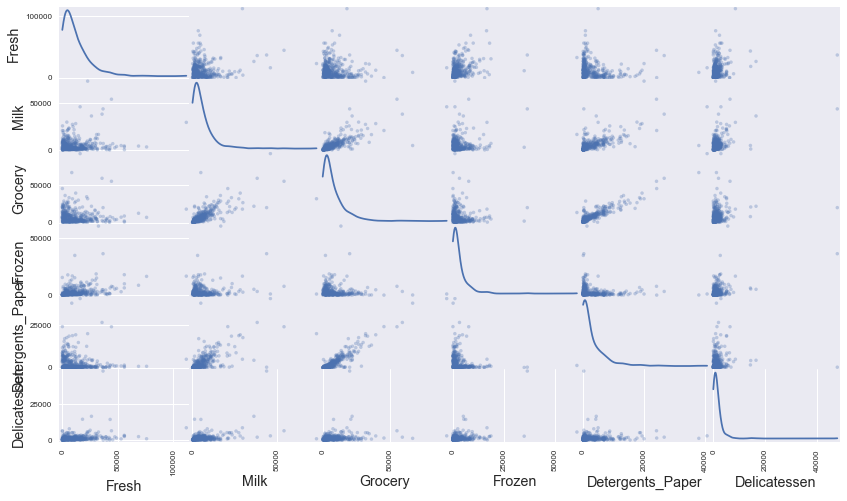

In [10]:
pd.plotting.scatter_matrix(data,alpha=0.3, figsize=(14,8), diagonal = 'kde')

1. From the scatter matrix, we can see the data Is Not Normally distributed due to the presence of many outliers. Evidently, most are skewed to the left where most of the data points lie. This indicates how normalization is required to make the data features normally distributed as clustering algorithms require them to be normally distributed.

2. The following pairs of features seem to indicate some correlation:

    * **Detergents_Paper and Grocery**: We can see a linear correlation here that's apparently strongly correlated with a coefficient of 0.92.
    * **Grocery and Milk**: Another linear correlation with almost similar strength to (Detergents_Paper~Milk) of 0.73.
    * **Detergents_Paper and Milk**: Another linear correlation, but less clear than (Milk~Grocery) - with a correlation coefficient of 0.66.
3. These features that are strongly correlated does lend credence to our initial claim that Grocery may not be necessary for identifying customers' spending habits. Grocery has a high correlation with Detergents_Paper and Milk that corresponds to a relatively high R2 score when we regress Grocery on all other features. 

# Data Preprocessing:

## Implementation: Feature Scaling

C:\Users\Geekquad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB20ECDA20>,
      dtype=object)

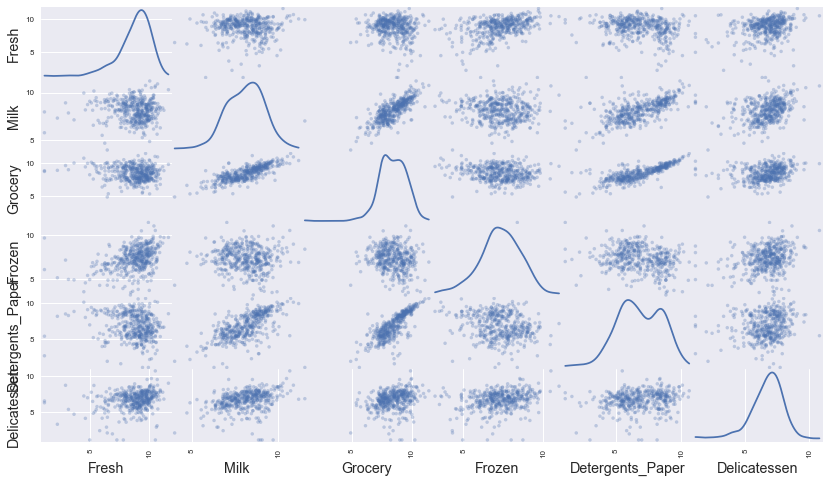

In [12]:
log_data = np.log(data)
log_samples = np.log(samples)
pd.scatter_matrix(log_data, alpha=0.3, figsize=(14,8), diagonal='kde')

### Observation

In [23]:
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.690604,8.349957,8.935245,5.303305,8.294799,4.043051
1,8.743372,6.998510,7.590852,8.258422,6.411818,7.678789
2,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


Distribution before Normalizing the Data


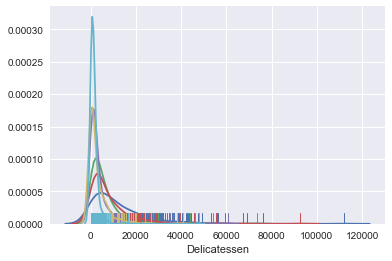

Distribution after Normalizing the Data


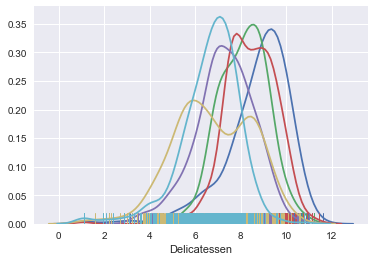

In [24]:
print("Distribution before Normalizing the Data")
sns.set(color_codes = True)
plt.show()
sns.distplot(data['Fresh'], rug=True, hist=False)
sns.distplot(data['Milk'], rug=True, hist=False)
sns.distplot(data['Grocery'], rug=True, hist=False)
sns.distplot(data['Frozen'], rug=True, hist=False)
sns.distplot(data['Detergents_Paper'], rug=True, hist=False)
sns.distplot(data['Delicatessen'], rug=True, hist=False)
plt.show()


print("Distribution after Normalizing the Data")
sns.set(color_codes = True)
plt.show()
sns.distplot(log_data['Fresh'], rug=True, hist=False)
sns.distplot(log_data['Milk'], rug=True, hist=False)
sns.distplot(log_data['Grocery'], rug=True, hist=False)
sns.distplot(log_data['Frozen'], rug=True, hist=False)
sns.distplot(log_data['Detergents_Paper'], rug=True, hist=False)
sns.distplot(log_data['Delicatessen'], rug=True, hist=False)
plt.show()

## Implementation: Outlier Detection

Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. Here, we will use <span style="color:blue">Tukey's Method for identfying outliers:</span> An outlier step is calculated as 1.5 times the interquartile range (IQR).

In [42]:
for feature in log_data.keys():
    
    Q1 = np.percentile(log_data[feature],25)
    Q3 = np.percentile(log_data[feature],75)
    step = (Q3-Q1)*1.5
    
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
outliers  = [65,66,75,128,154]
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [43]:
len(good_data)

435

# Feature Transformation

## Implementation: PCA

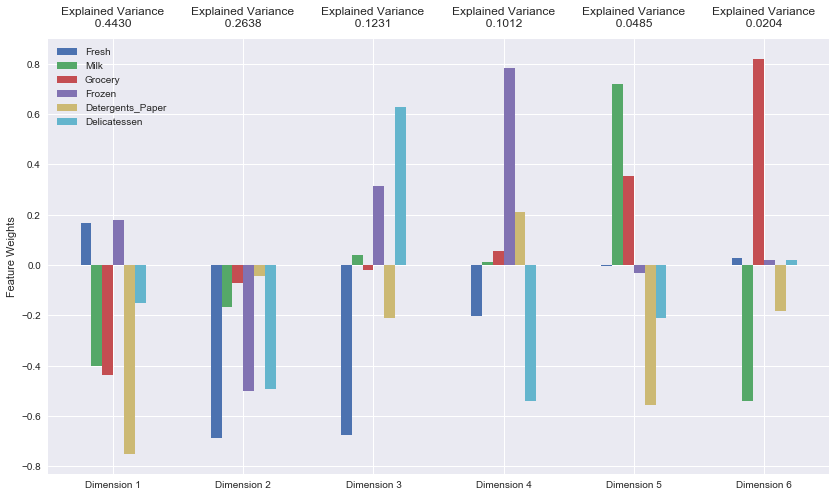

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6).fit(good_data)
pca_samples = pca.transform(log_samples)
pca_results = vs.pca_results(good_data, pca)

In [46]:
display(pca_results)
print(pca_results['Explained Variance'].cumsum())

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092
Dimension 6,0.0204,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197


Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


* 70.68% (0.7068) of the variance in the data is explained by the first and second principal components.
* 93.11% (0.9311) of the variance in the data is explained by the first four principal components.

* 1. **The first principal component (PC1):**
    * An increase in PC1 is associated with large increases in "Milk", "Grocery" and "Detergents_Paper" spending. These features best represent PC1.
    * This is in line with our initial findings where the 3 features are highly correlated.
  
  2. **The second principal component (PC2):**
    * An increase in PC2 is associated with large increases in "Fresh", "Frozen" and "Delicatessen" spending. These features best represent PC2.
    * This makes sense as PC1 represents different features. And in PC2, the features in PC1 have very small positive weights.
  3. **The third principal component (PC3):**
    * An increase in PC3 is associated with a large increase in "Delicatessen" and a large decrease in "Fresh" spending. These features best represent PC3.
  4. **The fourth principal component (PC4):**
    * An increase in PC4 is associated with a large increasing in "Frozen" and a large decrease in "Delicatessen" spending. These features best represent PC4.

### Observation

In [47]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.2292,1.5540,-3.2462,0.0043,0.1124,-0.0697
1,1.1404,-0.6710,0.9823,0.0603,-1.1423,0.0055
2,8.3026,-0.4747,0.9774,-1.1195,-0.2977,-4.3514


## Implementation: Dimensionality Reduction

When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the cumulative explained variance ratio is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In [50]:
pca = PCA(n_components=2).fit(good_data)
reduced_data = pca.transform(good_data)
pca_samples = pca.transform(log_samples)
reduced_data = pd.DataFrame(reduced_data, columns=['Dimension 1', 'Dimension 2'])

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941


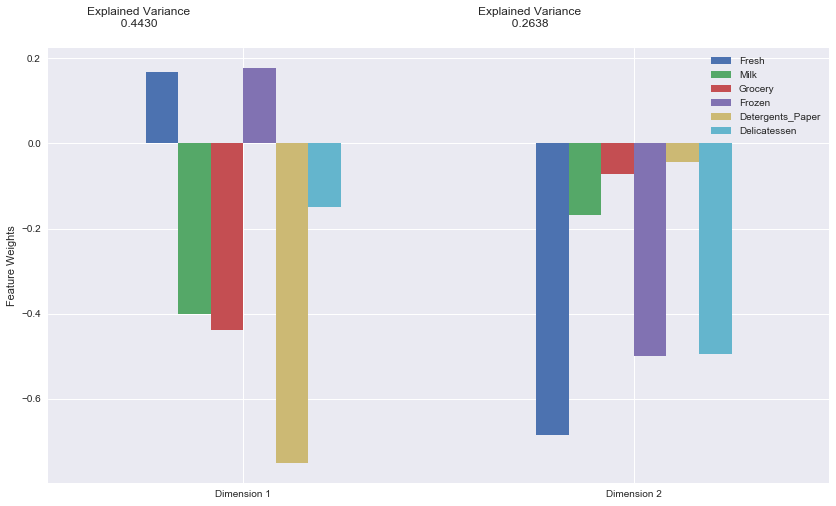

In [51]:
vs.pca_results(good_data, pca)

### Observation

In [52]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.2292,1.5540
1,1.1404,-0.6710
2,8.3026,-0.4747


## Visualizing a Biplot

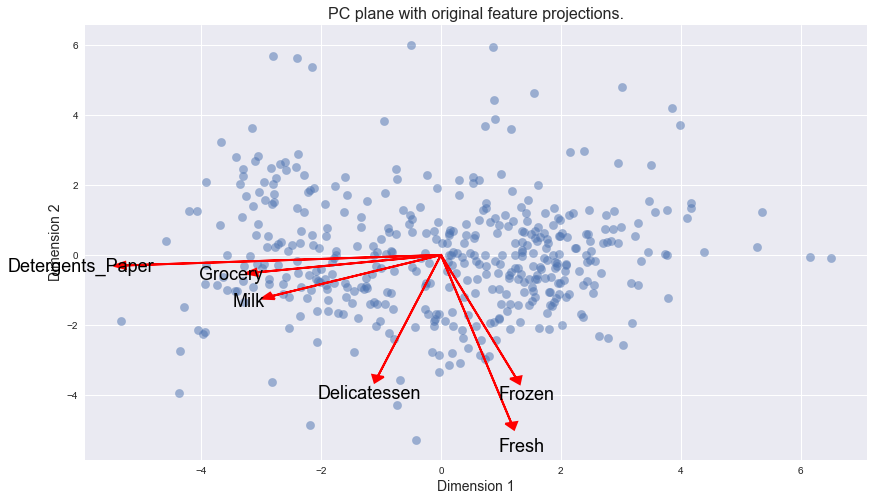

In [53]:
vs.biplot(good_data, reduced_data, pca)

### Observation
Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on 'Milk', 'Grocery' and 'Detergents_Paper', but not so much on the other product categories.

# Clustering

**K-means Clustering:**

* Advantages

    1. With a large number of features, K-means can be computationally faster if K is small.
    2. K-Means could result in tighter clusters than hierarchical clustering.

* Disadvantages

    1. Difficulty in comparing quality of the clusters produced.
    2. K-means is highly sensitive to outliers.
    3. Since preset K value is required, it could be difficult to predict which K is best.
    4. K-means assigns data poins to the closest cluster in terms of Euclidian distance. Thus, it treats distances in all directions equally. Hence k-Means produces only spherical clusters. Assumes data is globular with doesn't always occur in real-life data.
    5. K-means is a ligher version of GMM, it can be seen as a special (limit) case of GMMs, specifically as GMM with diagonal, equal and small covariance matrices.

**Gaussian Mixture Model (GMM):**

* Advantages

    1. Capable of "soft" classification. That is, each data point is assigned a probability for each cluster, indicating how likely it belongs to the cluster. K-means only provides hard assignments, i.e., it chooses a single cluster for each data point.
    2. If you think that your model is having some hidden, not observable parameters, then you should use GMM. This is because, this algorithm is assigning a probability to each point to belong to certain cluster, instead of assigning a flag that the point belongs to certain cluster as in the classical k-Means.
    3. Works with different distributions of the data. It can fit more complex cluster shapes since each mixture component can freely fit its covariance matrix.

* Disadvantages

    1. Could fail if the dimensionality of the problem is too high.
    2. For GMMs, many parameters must be fitted to the data (quadratic in the number of features) while k-means only maintains cluster centers (linear in number of features). Hence, take more time than K Means to train the data.

**Choosing The Final Algorithim:**

In this submission, the chosen algorithim is Gaussian Mixture Model because of its ability to apply "soft" classification and since we've reduced the dimensionality of the problem with PCA, GMM should be able to do the job. If our dataset was considerably larger, we could reconsider and use K-means.

## Implementation: Creating Clusters

In [57]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def produceGaussianMixture(k):
    clusterer = GaussianMixture(n_components=k, random_state=0).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    centers = clusterer.means_ 
    sample_preds = clusterer.predict(pca_samples)
    score = silhouette_score(reduced_data,preds)
    return score

results = pd.DataFrame(columns=['Silhouette Score'])
results.columns.name = 'Number of Clusters'    
for k in range(2,13):
    score = produceGaussianMixture(k) 
    results = results.append(pd.DataFrame([score],columns=['Silhouette Score'],index=[k]))

display(results)

Number of Clusters,Silhouette Score
2,0.421917
3,0.374202
4,0.329080
5,0.305875
6,0.224815
7,0.274334
8,0.344370
9,0.334324
10,0.340632
11,0.319716


- The silhouette scores for several sizes of clusters are displayed above.

- Overall, a **Gaussian Mixture Model with 2 clusters has the best silhouette score "0.421917"**

- As we increase the number of clusters, the Silhouette score gets closer to 0 which indicate overlapping clusters. Where as when using 2 clusters, we get score values closer to 1 indicating dense and well seperated clusters.

### Cluster Visualization

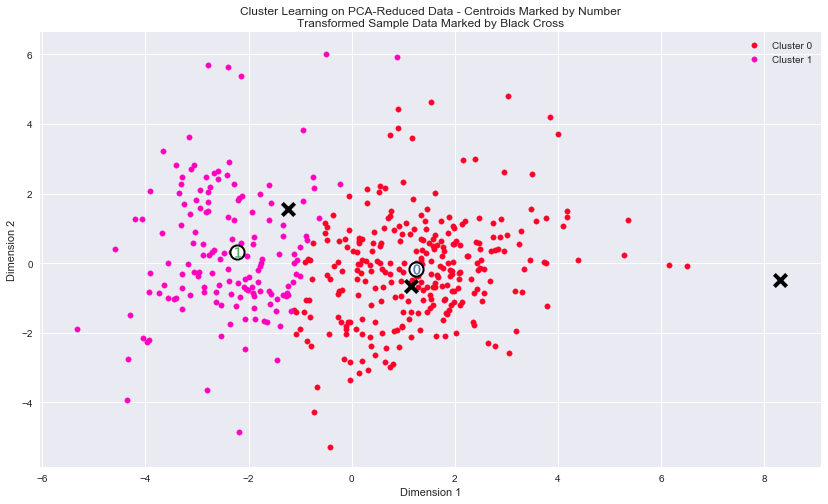

In [58]:
clusterer = GaussianMixture(n_components = 2, random_state=0).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
vs.cluster_results(reduced_data, preds, centers, pca_samples)

## Implementation: Data Recovery

Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the averages of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to the average customer of that segment. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In [59]:
log_centers = pca.inverse_transform(centers)
true_centers = np.exp(log_centers)
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8953.0,2114.0,2765.0,2075.0,353.0,732.0
Segment 1,3552.0,7837.0,12219.0,870.0,4696.0,962.0


In [64]:
display(data.mean())

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

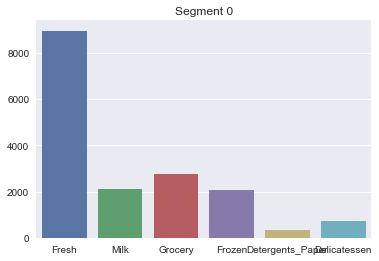

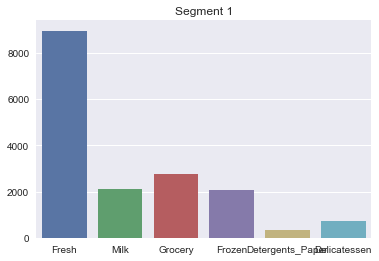

In [66]:
plt.figure()
plt.axes().set_title("Segment 0")
sns.barplot(x=true_centers.columns.values, y=true_centers.iloc[0].values)
plt.figure()
plt.axes().set_title("Segment 1")
sns.barplot(x=true_centers.columns.values, y=true_centers.iloc[0].values)

- **Cluster/Segment 0:** This most likely represents **cafes/restaurants** serving fresh food due to the strong weight upon the Fresh category. Whilst the volume falls below the overall population mean, it is consistent with the original prediction for what a Restaurant might look like in the Data Explotation section.

- **Cluster/Segment 1:** The quantities of Grocery and Milk are predominant here. The Milk and Grocery values in this cluster exceed the overall means observed in the Data Exploration section, which suggests the are bulk distributors or large resellers such as **Bulk Distributor / Supermarkets**